$$  \begin{align*}
        \mathrm{DMG_{out}} = \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right]
                             \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{_{\%}}} \times \mathrm{DMG_{crit}^{_{\%}}} \right) \\
    \end{align*} $$

- Fixed stats:
    - $\small \mathrm{ER^{_{\%}}}$
    - $\small \mathrm{ATK_{base}}$
    - $\small \mathrm{ATK_{flat}}$
    - $\small \mathrm{DMG_{bonus}^{_{\%}}}$
    
&nbsp;
- Optimized stats:
    - $\small \mathrm{ATK_{bonus}^{_{\%}}}$
    - $\small \mathrm{Rate_{crit}^{_{\%}}}$
    - $\small \mathrm{DMG_{crit}^{_{\%}}}$

&nbsp;
- 1 Score is worth either:
    - 5.25% of $\small \mathrm{ATK_{bonus}^{_{\%}}}$
    - 3.50% of $\small \mathrm{Rate_{crit}^{_{\%}}}$
    - 7.00% of $\small \mathrm{DMG_{crit}^{_{\%}}}$

$$  \begin{align*}
        \mathrm{Score} = \frac{\mathrm{ATK_{bonus}^{\%}}}{5.25\%} + \frac{\mathrm{Rate_{crit}^{\%}}}{3.50\%} + \frac{\mathrm{DMG_{crit}^{\%}}}{7.00\%} \\ \\
    \end{align*}$$

$$  \begin{cases}
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{ATK_{bonus}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{ATK_{bonus}^{_{\%}}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{Rate_{crit}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{Rate_{crit}^{_{\%}}}} \\ \\
        \frac{\partial \mathrm{DMG_{out}}}{\partial \mathrm{DMG_{crit}^{_{\%}}}} = \lambda \frac{\partial \mathrm{Score}}{\partial \mathrm{DMG_{crit}^{_{\%}}}}
    \end{cases}
    \implies
    \begin{cases}
        \mathrm{ATK_{base}} \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \left( 1 + \mathrm{Rate_{crit}^{_{\%}}} \times \mathrm{DMG_{crit}^{_{\%}}} \right) = \frac{\lambda}{5.25\%} \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \mathrm{DMG_{crit}^{_{\%}}} = \frac{\lambda}{3.50\%} \\ \\
        \left[ \mathrm{ATK_{base}} \times \left( 1 + \mathrm{ATK_{bonus}^{_{\%}}} \right) + \mathrm{ATK_{flat}} \right] \times \left( 1 + \mathrm{DMG_{bonus}^{_{\%}}} \right) \times \mathrm{Rate_{crit}^{_{\%}}} = \frac{\lambda}{7.00\%}
    \end{cases}
    \implies
    \begin{cases}
        \lambda' = 1 + \mathrm{ATK_{bonus}^{_{\%}}} + \frac{\mathrm{ATK_{flat}}}{\mathrm{ATK_{base}}} \\ \\
        \lambda' = \frac{3}{2} \left(\mathrm{Rate_{crit}^{_{\%}}} + \frac{1}{\mathrm{DMG_{crit}^{_{\%}}}} \right) \\ \\
        \lambda' = \frac{3}{4} \left(\mathrm{DMG_{crit}^{_{\%}}} + \frac{1}{\mathrm{Rate_{crit}^{_{\%}}}} \right)
    \end{cases} $$

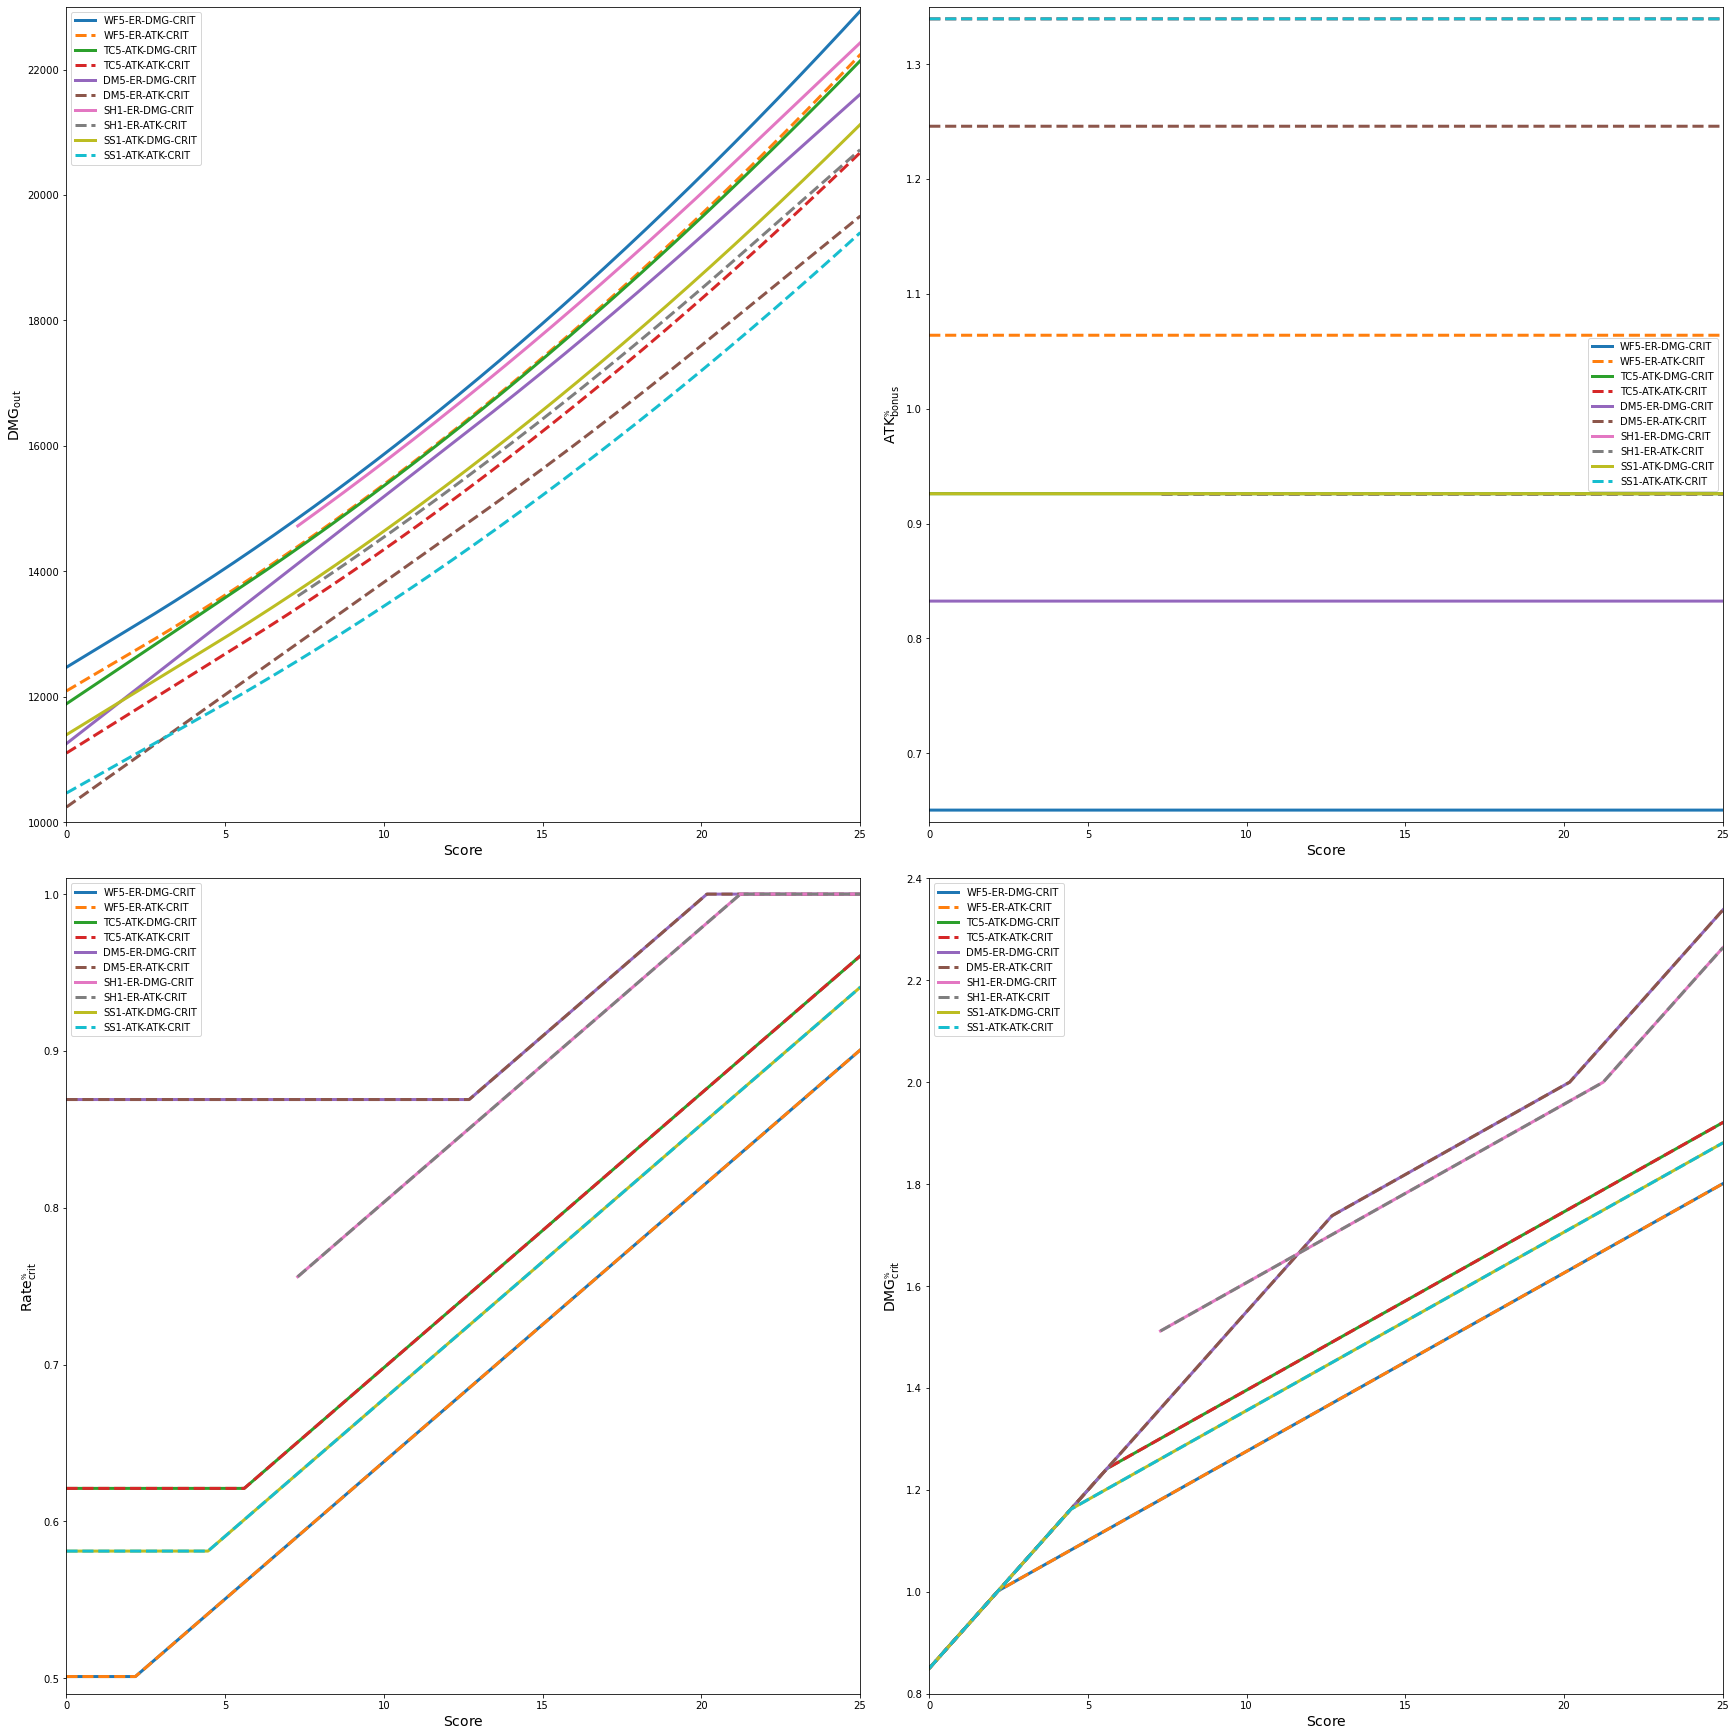

In [1]:
import numpy as np
from matplotlib import pyplot

def xiangling():
    stats = {
        'HP_base': 10875,
        'ATK_base': 225,
        'DEF_base': 669,
        'HP_flat': 0,
        'ATK_flat': 0,
        'DEF_flat': 0,
        'HP_bonus': 0,
        'ATK_bonus': 0,
        'DEF_bonus': 0,
        'DMG_bonus': 0,
        'EM': 96,
        'ER': 100/100,
        'Rate_crit': 5/100,
        'DMG_crit': 50/100
    }

    return stats

def flower(stats):
    # Mainstat
    stats['HP_flat'] += 4780
    # Substats
    stats['ATK_bonus'] += 5.25/100
    stats['EM'] += 20.98
    stats['Rate_crit'] += 3.50/100
    stats['DMG_crit'] += 7.00/100

def plume(stats):
    # Mainstat
    stats['ATK_flat'] += 311
    # Substats
    stats['ATK_bonus'] += 5.25/100
    stats['EM'] += 20.98
    stats['Rate_crit'] += 3.50/100
    stats['DMG_crit'] += 7.00/100

def artifact_ER(stats):
    # Mainstat
    stats['ER'] += 51.8/100
    # Substats
    stats['ATK_bonus'] += 5.25/100
    stats['EM'] += 20.98
    stats['Rate_crit'] += 3.50/100
    stats['DMG_crit'] += 7.00/100

def artifact_ATK(stats):
    # Mainstat
    stats['ATK_bonus'] += 46.6/100
    # Substats
    stats['EM'] += 20.98
    stats['ER'] += 5.83/100
    stats['Rate_crit'] += 3.50/100
    stats['DMG_crit'] += 7.00/100

def artifact_DMG(stats):
    # Mainstat
    stats['DMG_bonus'] += 46.6/100
    # Substats
    stats['ATK_bonus'] += 5.25/100
    stats['EM'] += 20.98
    stats['Rate_crit'] += 3.50/100
    stats['DMG_crit'] += 7.00/100

def artifact_CRIT(stats):
    # Mainstat
    stats['Rate_crit'] += 31.1/100
    # Substats
    stats['ATK_flat'] += 17.51
    stats['ATK_bonus'] += 5.25/100
    stats['EM'] += 20.98
    stats['DMG_crit'] += 7.00/100

def EoSF(stats):
    stats['ER'] += 20/100
    stats['DMG_bonus'] += min(stats['ER']/4, 75/100)

def bennett_Q(stats):
    stats['ATK_flat'] += 1000

def raiden_E(stats):
    stats['DMG_bonus'] += 80 * 0.3/100

def kazuha_A4(stats):
    stats['DMG_bonus'] += 950 * 0.04/100

def pyro_resonance(stats):
    stats['ATK_bonus'] += 25/100

def wavebreakers_fin(stats):
    stats['ATK_base'] += 620
    stats['ATK_bonus'] += 13.8/100
    stats['DMG_bonus'] += min(290 * 0.24/100, 80/100)

def the_catch(stats):
    stats['ATK_base'] += 510
    stats['ER'] += 45.9/100
    stats['DMG_bonus'] += 32/100
    stats['Rate_crit'] += 12/100

def deathmatch(stats):
    stats['ATK_base'] += 454
    stats['Rate_crit'] += 36.8/100
    stats['ATK_bonus'] += 32/100
    stats['DEF_bonus'] += 32/100

def staff_of_homa(stats):
    stats['ATK_base'] += 608
    stats['DMG_crit'] += 66.2/100
    stats['HP_bonus'] += 20/100
    stats['ATK_flat'] += (stats['HP_base'] * (1 + stats['HP_bonus']) + stats['HP_flat']) * 0.8/100

def skyward_spine(stats):
    stats['ATK_base'] += 674
    stats['ER'] += 36.8/100
    stats['Rate_crit'] += 8/100



WF5_ER_DMG_CRIT = xiangling()
[f(WF5_ER_DMG_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_DMG, artifact_CRIT, wavebreakers_fin, EoSF]]

WF5_ER_ATK_CRIT = xiangling()
[f(WF5_ER_ATK_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_ATK, artifact_CRIT, wavebreakers_fin, EoSF]]

TC5_ATK_DMG_CRIT = xiangling()
[f(TC5_ATK_DMG_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ATK, artifact_DMG, artifact_CRIT, the_catch, EoSF]]

TC5_ATK_ATK_CRIT = xiangling()
[f(TC5_ATK_ATK_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ATK, artifact_ATK, artifact_CRIT, the_catch, EoSF]]

DM5_ER_DMG_CRIT = xiangling()
[f(DM5_ER_DMG_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_DMG, artifact_CRIT, deathmatch, EoSF]]

DM5_ER_ATK_CRIT = xiangling()
[f(DM5_ER_ATK_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_ATK, artifact_CRIT, deathmatch, EoSF]]

SH1_ER_DMG_CRIT = xiangling()
[f(SH1_ER_DMG_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_DMG, artifact_CRIT, staff_of_homa, EoSF]]

SH1_ER_ATK_CRIT = xiangling()
[f(SH1_ER_ATK_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ER, artifact_ATK, artifact_CRIT, staff_of_homa, EoSF]]

SS1_ATK_DMG_CRIT = xiangling()
[f(SS1_ATK_DMG_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ATK, artifact_DMG, artifact_CRIT, skyward_spine, EoSF]]

SS1_ATK_ATK_CRIT = xiangling()
[f(SS1_ATK_ATK_CRIT) for f in [bennett_Q, raiden_E, kazuha_A4, pyro_resonance, flower, plume, artifact_ATK, artifact_ATK, artifact_CRIT, skyward_spine, EoSF]]



fig, axs = pyplot.subplots(2, 2, constrained_layout=True, figsize=(24, 24))
axs[0, 0].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[0, 0].set_ylabel(r'$\mathrm{DMG_{out}}$', fontsize=14)
axs[0, 0].set_xlim(0, 25)
axs[0, 0].set_ylim(10000, 23000)
axs[0, 1].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[0, 1].set_ylabel(r'$\mathrm{ATK_{bonus}^{_{\%}}}$', fontsize=14)
axs[0, 1].set_xlim(0, 25)
axs[0, 1].set_ylim(0.64, 1.35)
axs[1, 0].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[1, 0].set_ylabel(r'$\mathrm{Rate_{crit}^{_{\%}}}$', fontsize=14)
axs[1, 0].set_xlim(0, 25)
axs[1, 0].set_ylim(0.49, 1.01)
axs[1, 1].set_xlabel(r'$\mathrm{Score}$', fontsize=14)
axs[1, 1].set_ylabel(r'$\mathrm{DMG_{crit}^{_{\%}}}$', fontsize=14)
axs[1, 1].set_xlim(0, 25)
axs[1, 1].set_ylim(0.8, 2.4)

def plot(axs, label, linestyle, atk_bonus, rate_crit, dmg_crit, dmg_out, score):
    axs[0, 0].plot(score, dmg_out, linestyle=linestyle, linewidth=3, label=label)
    axs[0, 1].plot(score, atk_bonus, linestyle=linestyle, linewidth=3, label=label)
    axs[1, 0].plot(score, rate_crit, linestyle=linestyle, linewidth=3, label=label)
    axs[1, 1].plot(score, dmg_crit, linestyle=linestyle, linewidth=3, label=label)

def optimize_stats(stats):
    dmg_crit = np.linspace(stats['DMG_crit'], 10.0, 10000)
    rate_crit = np.maximum(np.minimum(dmg_crit/2, 1.0), stats['Rate_crit'])
    atk_bonus = np.maximum((3/4) * (dmg_crit + 1/rate_crit) - 1 - (stats['ATK_flat'] / stats['ATK_base']), stats['ATK_bonus'])
    dmg_out = (stats['ATK_base'] * (1 + atk_bonus) + stats['ATK_flat']) * (1 + stats['DMG_bonus']) * (1 + rate_crit * dmg_crit)
    score_modifier = ((stats['ATK_bonus'] / 5.25) + (stats['Rate_crit'] / 3.50) + (stats['DMG_crit'] / 7.00)) * 100
    score = ((atk_bonus / 5.25) + (rate_crit / 3.50) + (dmg_crit / 7.00)) * 100 - score_modifier
    return (atk_bonus, rate_crit, dmg_crit, dmg_out, score)

plot(axs, 'WF5-ER-DMG-CRIT', 'solid', *optimize_stats(WF5_ER_DMG_CRIT))
plot(axs, 'WF5-ER-ATK-CRIT', 'dashed', *optimize_stats(WF5_ER_ATK_CRIT))
plot(axs, 'TC5-ATK-DMG-CRIT', 'solid', *optimize_stats(TC5_ATK_DMG_CRIT))
plot(axs, 'TC5-ATK-ATK-CRIT', 'dashed', *optimize_stats(TC5_ATK_ATK_CRIT))
plot(axs, 'DM5-ER-DMG-CRIT', 'solid', *optimize_stats(DM5_ER_DMG_CRIT))
plot(axs, 'DM5-ER-ATK-CRIT', 'dashed', *optimize_stats(DM5_ER_ATK_CRIT))
plot(axs, 'SH1-ER-DMG-CRIT', 'solid', *optimize_stats(SH1_ER_DMG_CRIT))
plot(axs, 'SH1-ER-ATK-CRIT', 'dashed', *optimize_stats(SH1_ER_ATK_CRIT))
plot(axs, 'SS1-ATK-DMG-CRIT', 'solid', *optimize_stats(SS1_ATK_DMG_CRIT))
plot(axs, 'SS1-ATK-ATK-CRIT', 'dashed', *optimize_stats(SS1_ATK_ATK_CRIT))

for ax in axs.flat:
    ax.legend()